# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [19]:
import pandas as pd
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [6]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

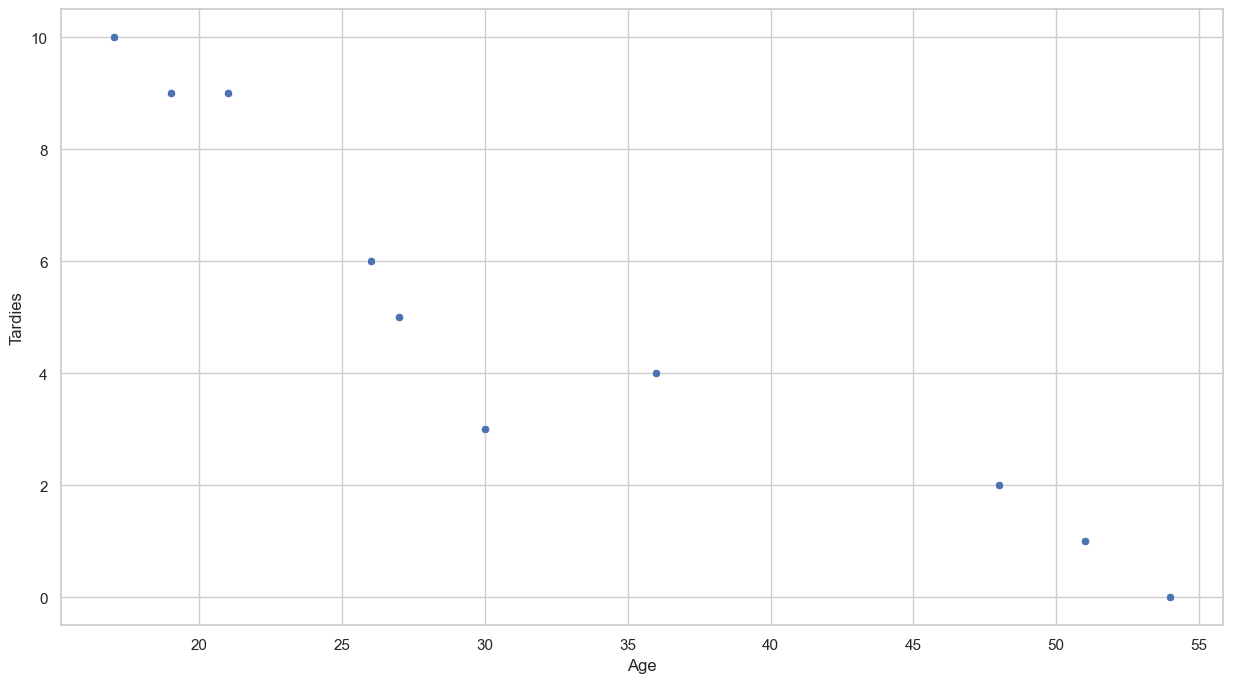

In [10]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [12]:
"""there is a trend here, its looks like a obvious 
line that decrease the number of tardies by the older you are, 
there are also some ouliers but not for much."""

'there is a trend here, its looks like a obvious \nline that decrease the number of tardies by the older you are, \nthere are also some ouliers but not for much.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [13]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [20]:
lr = LinearRegression()

In [24]:
lr.fit(X = student_data[["Age"]],
       y = student_data.Tardies)

LinearRegression()

Plot your regression model on your scatter plot.

In [26]:
student_data["prediction"] = lr.coef_[0] * student_data.Age + lr.intercept_

In [27]:
student_data[["Age", "Tardies", "prediction"]].sample()

,Age,Tardies,prediction
5,48,2,1.233406


In [28]:
student_data["error"] = (student_data.Age - student_data.prediction).abs()

In [29]:
student_data[["Age", "Tardies", "prediction", "error"]].sample()

,Age,Tardies,prediction,error
8,54,0,-0.223518,54.223518


In [30]:
student_data.error.mean()

28.0

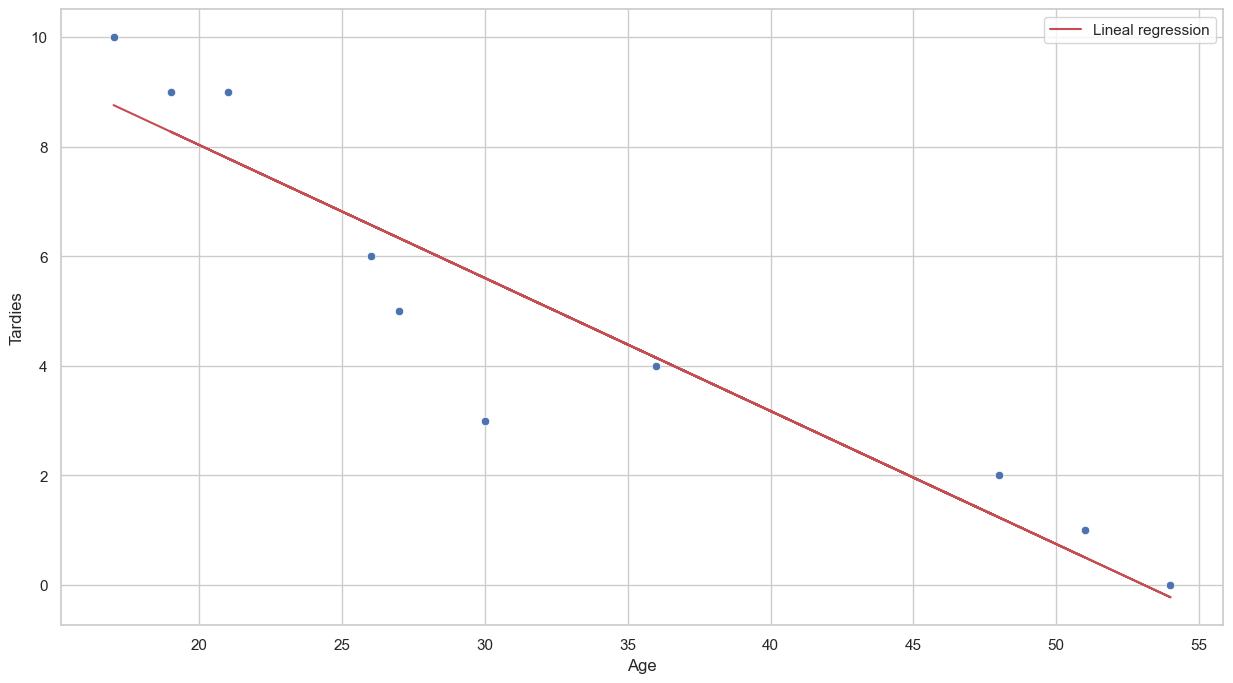

In [33]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data.prediction, label="Lineal regression", color="r")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
""" We can see that theres a correlation between the 2 datas, 
the age and the tardies, the line go straight throw where the points are. 
we could also say that is biased because there are not many information,
not many cases but with the few we have it does have a correlation. """

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [81]:
df = pd.read_csv("D:\ironhack\semana_7\lab-regression-analysis\\vehicles.csv")
df.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
29581,Porsche,Carrera 4 S Cabriolet Kit,2005,3.6,6.0,Manual 6-spd,4-Wheel or All-Wheel Drive,Minicompact Cars,Premium,18.311667,15,22,18,493.722222,2250


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [82]:
df1 = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", 'CO2 Emission Grams/Mile']]

In [83]:
df1.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

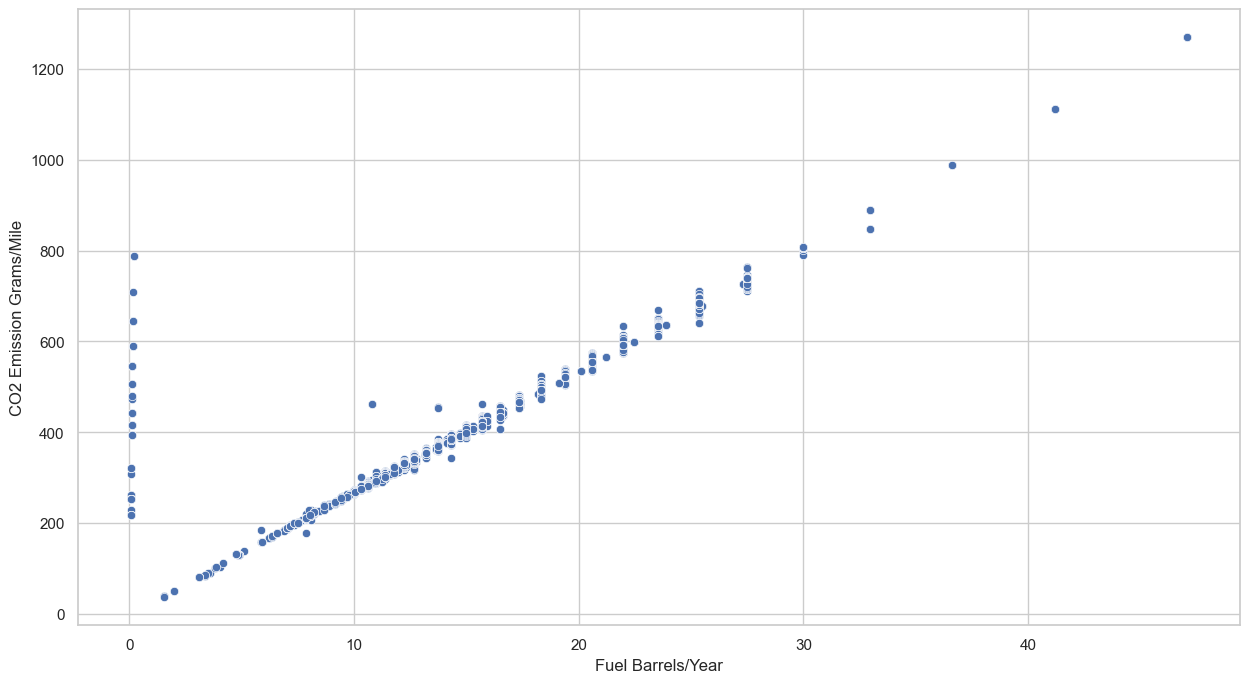

In [84]:
sns.scatterplot(x=df1["Fuel Barrels/Year"], y=df1["CO2 Emission Grams/Mile"]);

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(X = df1[["Fuel Barrels/Year"]],
       y = df1["CO2 Emission Grams/Mile"])

LinearRegression()

In [87]:
df1["prediction"] = lr.coef_[0] * df1["Fuel Barrels/Year"] + lr.intercept_

C:\Users\ima_n\AppData\Local\Temp\ipykernel_20036\1027425244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["prediction"] = lr.coef_[0] * df1["Fuel Barrels/Year"] + lr.intercept_


In [88]:
df1[["Fuel Barrels/Year", 'CO2 Emission Grams/Mile', "prediction"]]

,Fuel Barrels/Year,CO2 Emission Grams/Mile,prediction
0,19.388824,522.764706,522.095095
1,25.354615,683.615385,678.897734
2,20.600625,555.437500,553.945631
3,25.354615,683.615385,678.897734
4,20.600625,555.437500,553.945631
...,...,...,...
35947,9.155833,244.000000,253.135014
35948,9.155833,243.000000,253.135014
35949,9.155833,244.000000,253.135014
35950,9.155833,246.000000,253.135014


In [91]:
df1["error"] = (df1["Fuel Barrels/Year"] - df1.prediction).abs()
df1[["Fuel Barrels/Year", 'CO2 Emission Grams/Mile', "prediction", "error"]]

C:\Users\ima_n\AppData\Local\Temp\ipykernel_20036\1385827431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["error"] = (df1["Fuel Barrels/Year"] - df1.prediction).abs()


,Fuel Barrels/Year,CO2 Emission Grams/Mile,prediction,error
0,19.388824,522.764706,522.095095,502.706272
1,25.354615,683.615385,678.897734,653.543118
2,20.600625,555.437500,553.945631,533.345006
3,25.354615,683.615385,678.897734,653.543118
4,20.600625,555.437500,553.945631,533.345006
...,...,...,...,...
35947,9.155833,244.000000,253.135014,243.979181
35948,9.155833,243.000000,253.135014,243.979181
35949,9.155833,244.000000,253.135014,243.979181
35950,9.155833,246.000000,253.135014,243.979181


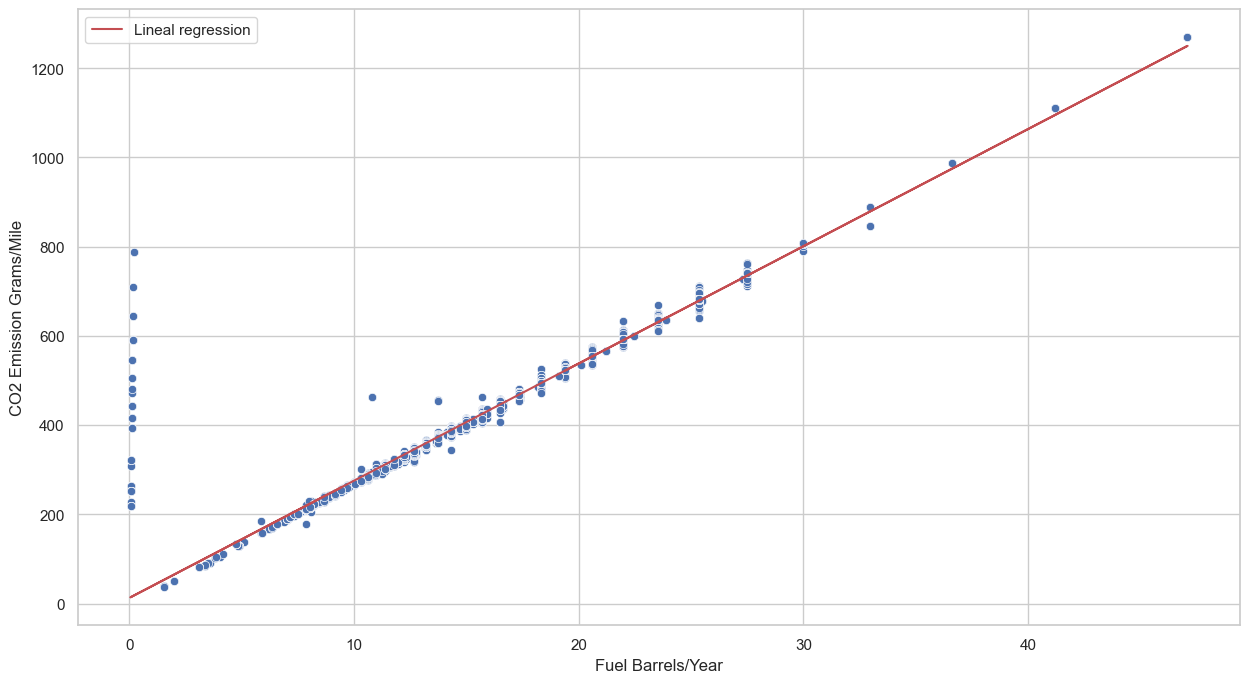

In [89]:
sns.scatterplot(x=df1["Fuel Barrels/Year"], y=df1["CO2 Emission Grams/Mile"])
plt.plot(df1["Fuel Barrels/Year"], df1["prediction"], label="Lineal regression", color="r")
plt.legend();

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [93]:
x = {"invited":[1,23,4,6,8,9,11,14], "attended" : [1,2,4,4,5,7,8,13]}

In [95]:
x = pd.DataFrame(x)
x

,invited,attended
0,1,1
1,23,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<Axes: xlabel='invited', ylabel='attended'>

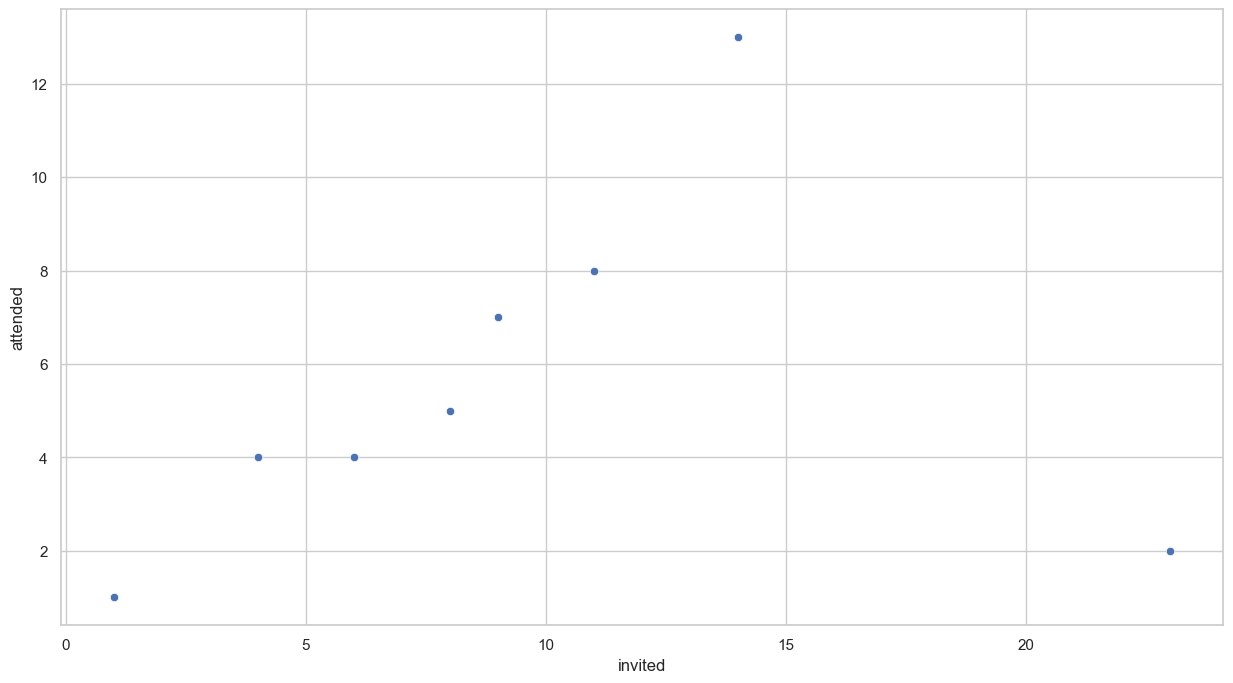

In [96]:
sns.scatterplot(x=x["invited"], y=x["attended"])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(X = x[["invited"]],
       y = x["attended"])

LinearRegression()

In [99]:
x["prediction"] = lr.coef_[0] * x["attended"] + lr.intercept_

In [ ]:
x[["Fuel Barrels/Year", 'CO2 Emission Grams/Mile', "prediction"]]
df1["error"] = (df1["Fuel Barrels/Year"] - df1.prediction).abs()
df1[["Fuel Barrels/Year", 'CO2 Emission Grams/Mile', "prediction", "error"]]

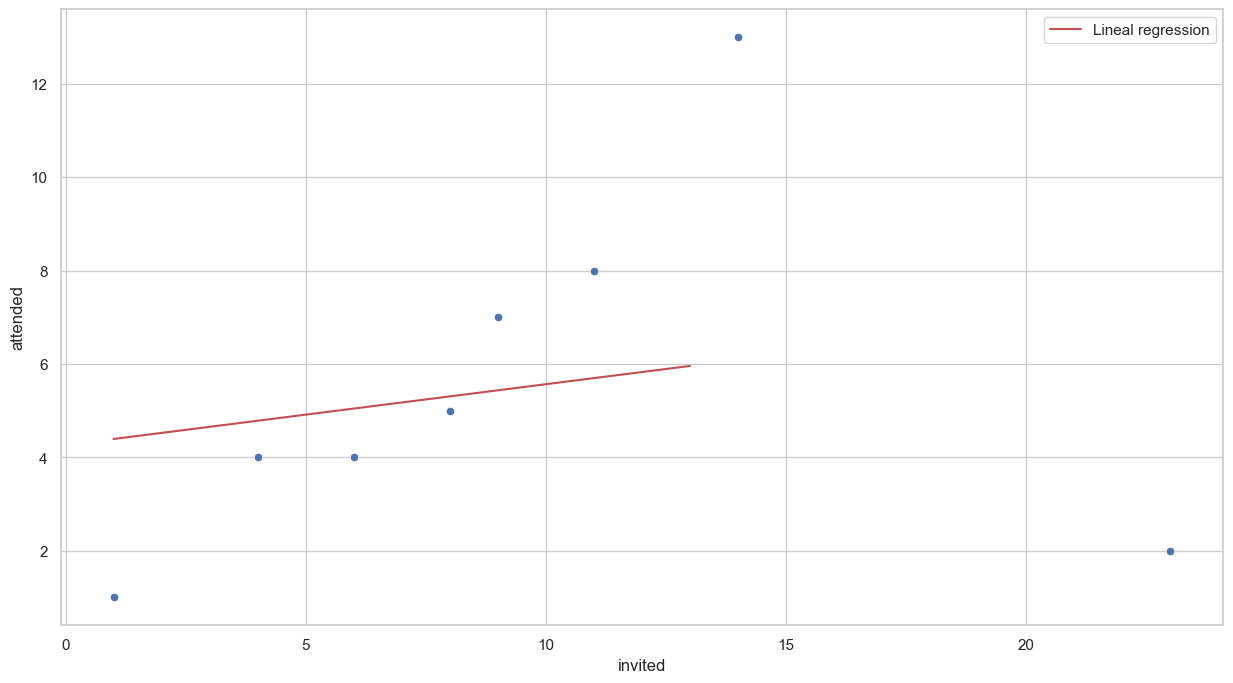

In [100]:
sns.scatterplot(x=x["invited"], y=x["attended"])
plt.plot(x["attended"], x["prediction"], label="Lineal regression", color="r")
plt.legend();

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 